<a href="https://colab.research.google.com/github/gamerxkj/image_captioning/blob/master/Image_Captioning_IE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
load_dataset = '/content/gdrive/My Drive/image captioning/Flickr8k_Dataset/Flicker8k_Dataset'

Mounted at /content/drive/


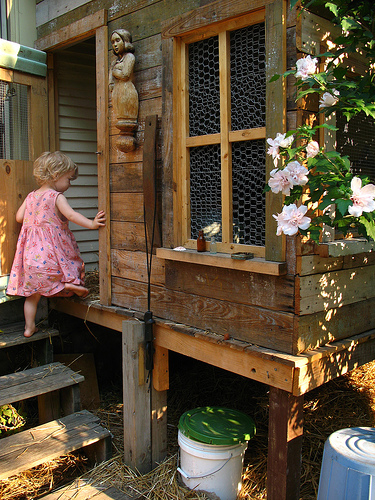

In [ ]:
from PIL import Image as Img
pic = '/content/drive/My Drive/image captioning/Flickr8k_Dataset/Flicker8k_Dataset/1000268201_693b08cb0e.jpg'
display(Img.open(pic))

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
load_dataset = '/content/gdrive/My Drive/image captioning/Flickr8k_text'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/image captioning/Flickr8k_text/Flickr_8k.trainImages.txt")
df     # with this command you can see your file

,2513260012_03d33305cf.jpg
0,2903617548_d3e38d7f88.jpg
1,3338291921_fe7ae0c8f8.jpg
2,488416045_1c6d903fe0.jpg
3,2644326817_8f45080b87.jpg
4,218342358_1755a9cce1.jpg
...,...
5994,3488512097_e500cb499f.jpg
5995,964197865_0133acaeb4.jpg
5996,58363930_0544844edd.jpg
5997,3107889179_106d223345.jpg


In [ ]:
import pandas as pd

In [ ]:
for i in range(0,5):
  print(df.iat[i,0])

2903617548_d3e38d7f88.jpg
3338291921_fe7ae0c8f8.jpg
488416045_1c6d903fe0.jpg
2644326817_8f45080b87.jpg
218342358_1755a9cce1.jpg


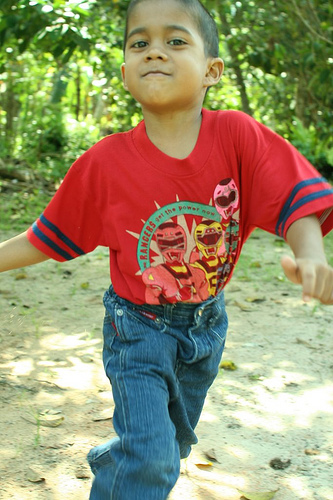

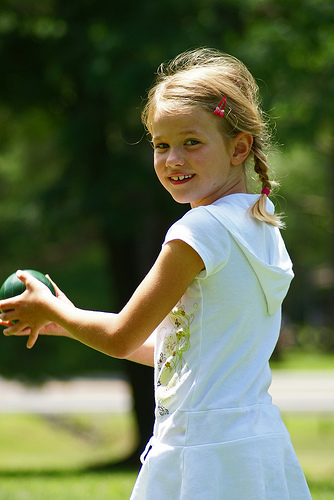

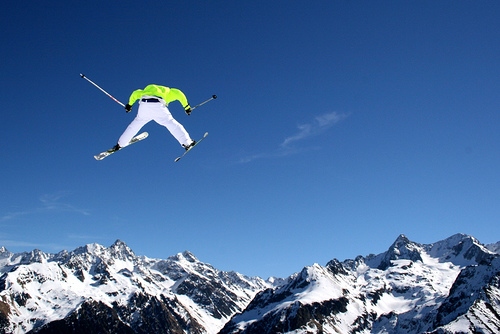

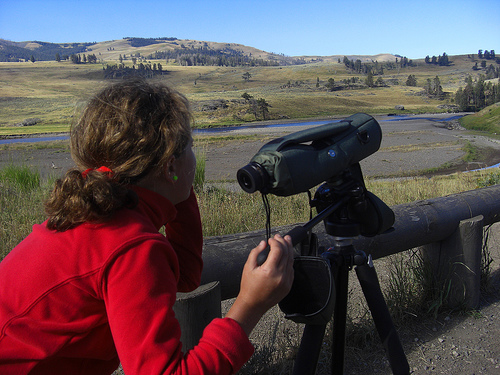

In [ ]:
from PIL import Image as Img
pic = "/content/drive/My Drive/image captioning/Flickr8k_Dataset/Flicker8k_Dataset"
 
for i in range(6,10):
  str = df.iat[i,0]
  display(Img.open(pic + "/" + str))



In [ ]:
captions = pd.read_csv('/content/drive/My Drive/image captioning/Flickr8k_text/Flickr8k.token.txt', error_bad_lines=False)
captions

b'Skipping line 36: expected 1 fields, saw 2\nSkipping line 38: expected 1 fields, saw 2\nSkipping line 85: expected 1 fields, saw 2\nSkipping line 86: expected 1 fields, saw 3\nSkipping line 130: expected 1 fields, saw 2\nSkipping line 139: expected 1 fields, saw 3\nSkipping line 169: expected 1 fields, saw 2\nSkipping line 186: expected 1 fields, saw 2\nSkipping line 207: expected 1 fields, saw 3\nSkipping line 213: expected 1 fields, saw 2\nSkipping line 268: expected 1 fields, saw 2\nSkipping line 305: expected 1 fields, saw 2\nSkipping line 308: expected 1 fields, saw 3\nSkipping line 314: expected 1 fields, saw 2\nSkipping line 316: expected 1 fields, saw 3\nSkipping line 334: expected 1 fields, saw 2\nSkipping line 382: expected 1 fields, saw 2\nSkipping line 489: expected 1 fields, saw 2\nSkipping line 504: expected 1 fields, saw 2\nSkipping line 519: expected 1 fields, saw 2\nSkipping line 557: expected 1 fields, saw 2\nSkipping line 558: expected 1 fields, saw 2\nSkipping lin

,1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .
0,1000268201_693b08cb0e.jpg#1\tA girl going into...
1,1000268201_693b08cb0e.jpg#2\tA little girl cli...
2,1000268201_693b08cb0e.jpg#3\tA little girl cli...
3,1000268201_693b08cb0e.jpg#4\tA little girl in ...
4,1001773457_577c3a7d70.jpg#0\tA black dog and a...
...,...
38007,997722733_0cb5439472.jpg#0\tA man in a pink sh...
38008,997722733_0cb5439472.jpg#1\tA man is rock clim...
38009,997722733_0cb5439472.jpg#2\tA person in a red ...
38010,997722733_0cb5439472.jpg#3\tA rock climber in ...


In [ ]:
file = open("/content/drive/My Drive/image captioning/Flickr8k_text/Flickr8k.token.txt",'r')
doc = file.read()

In [ ]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import string
import os
from PIL import Image
import glob
import re
import pickle 
from pickle import dump, load
from time import time
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [ ]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

filename = "/content/drive/My Drive/image captioning/Flickr8k_text/Flickr8k.token.txt"
# load descriptions
doc = load_doc(filename)
print(doc[:300])

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg#1	A girl going into a wooden building .
1000268201_693b08cb0e.jpg#2	A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg#3	A little girl climbing the s


In [ ]:
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# extract filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping

# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

Loaded: 8092 


In [ ]:
list(descriptions.keys())[:5]

['1000268201_693b08cb0e',
 '1001773457_577c3a7d70',
 '1002674143_1b742ab4b8',
 '1003163366_44323f5815',
 '1007129816_e794419615']

In [ ]:
def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]
			# tokenize
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuation from each token
			desc = [w.translate(table) for w in desc]
			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]
			# remove tokens with numbers in them
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  ' '.join(desc)

# clean descriptions
clean_descriptions(descriptions)

In [ ]:
def to_vocabulary(descriptions):
	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Original Vocabulary Size: %d' % len(vocabulary))

Original Vocabulary Size: 8763


In [ ]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

save_descriptions(descriptions, 'descriptions.txt')

In [ ]:
# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load training dataset (6K)
filename = '/content/drive/My Drive/image captioning/Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))

Dataset: 6000


In [ ]:
# Below path contains all the images
##images = '/content/drive/My Drive/image captioning/Flickr8k_Dataset/Flicker8k_Dataset/'
# Create a list of all image names in the directory
#img = glob.glob(images + '.jpg')
##img = os.listdir(images)
# Below path contains all the images
images = '/content/drive/My Drive/image captioning/Flickr8k_Dataset/Flicker8k_Dataset/'
# Create a list of all image names in the directory
img = glob.glob(images + '*.jpg')

In [ ]:
# Below file conatains the names of images to be used in train data
train_images_file = '/content/drive/My Drive/image captioning/Flickr8k_text/Flickr_8k.trainImages.txt'
#/content/drive/My Drive/image captioning/Flickr8k_text/Flickr_8k.trainImages.txt
# Read the train image names in a set
train_images = set(open(train_images_file, 'r').read().strip().split('\n'))
# Create a list of all the training images with their full path names
train_img = []


for i in img: # img is list of full path names of all images
   # if i in train_images: # Check if the image belongs to training set
    if i[len(images):] in train_images:
        train_img.append(i)# Add it to the list of train images

In [ ]:
test_images_file = '/content/drive/My Drive/image captioning/Flickr8k_text/Flickr_8k.testImages.txt'
# Read the validation image names in a set# Read the test image names in a set
test_images = set(open(test_images_file, 'r').read().strip().split('\n'))

# Create a list of all the test images with their full path names
test_img = []


for i in img:
   # print(i) # img is list of full path names of all images
    if i[len(images):] in test_images: # Check if the image belongs to test set
        test_img.append(i) # Add it to the list of test images

In [ ]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))

Descriptions: train=6000


In [ ]:
def preprocess(image_path):
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = image.load_img(image_path, target_size=(299, 299))
    # Convert PIL image to numpy array of 3-dimensions
    x = image.img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis=0)
    # preprocess the images using preprocess_input() from inception module
    x = preprocess_input(x)
    return x

In [ ]:
# Load the inception v3 model
model = InceptionV3(weights='imagenet')
# Create a new model, by removing the last layer (output layer) from the inception v3
model_new = Model(model.input, model.layers[-2].output)

96116736/96112376 [==============================] - 2s 0us/step


In [ ]:
# Function to encode a given image into a vector of size (2048, )
def encode(image):
    image = preprocess(image) # preprocess the image
    fea_vec = model_new.predict(image) # Get the encoding vector for the image
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1]) # reshape from (1, 2048) to (2048, )
    return fea_vec

In [ ]:
# Call the funtion to encode all the train images
start = time()
encoding_train = {}
i = 0
for img in train_img:
   ## encoding_train[img] = encode(images + img)
   encoding_train[img[len(images):]] = encode(img)
   print(i)
   i = i + 1
print("Time taken in seconds =", time()-start)

Streaming output truncated to the last 5000 lines.
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191

In [ ]:
# Save the bottleneck train features to disk
with open("/content/drive/My Drive/image captioning/Pickle/encoded_train_images.pkl", "wb") as encoded_pickle:
    pickle.dump(encoding_train, encoded_pickle)
# Call the funtion to encode all the test images
start = time()
encoding_test = {}
for img in test_img:
    encoding_test[img[len(images):]] = encode(img)
print("Time taken in seconds =", time()-start)
# Save the bottleneck test features to disk
print(os.listdir('/content/drive/My Drive/image captioning/Pickle/'))
with open("/content/drive/My Drive/image captioning/Pickle/encoded_test_images.pkl", "wb") as encoded_pickle:
    pickle.dump(encoding_test, encoded_pickle)
train_features = load(open("/content/drive/My Drive/image captioning/Pickle/encoded_train_images.pkl", "rb"))
print('Photos: train=%d' % len(train_features))

Time taken in seconds = 380.9314856529236
['encoded_test_images.pkl', 'encoded_train_images.pkl']
Photos: train=6000


In [ ]:
train_features = load(open("/content/drive/My Drive/image captioning/Pickle/encoded_train_images.pkl", "rb"))
print('Photos: train=%d' % len(train_features))

Photos: train=6000


In [ ]:
# Create a list of all the training captions
all_train_captions = []
for key, val in train_descriptions.items():
    for cap in val:
        all_train_captions.append(cap)
len(all_train_captions)

30000

In [ ]:
# Consider only words which occur at least 10 times in the corpus
word_count_threshold = 10
word_counts = {}
nsents = 0
for sent in all_train_captions:
    nsents += 1
    for w in sent.split(' '):
        word_counts[w] = word_counts.get(w, 0) + 1

vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('preprocessed words %d -> %d' % (len(word_counts), len(vocab)))

preprocessed words 7578 -> 1651


In [ ]:
ixtoword = {}
wordtoix = {}

ix = 1
for w in vocab:
    wordtoix[w] = ix
    ixtoword[ix] = w
    ix += 1
vocab_size = len(ixtoword) + 1 
vocab_size

1652

In [ ]:
# convert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

Description Length: 34


In [ ]:
import os
# data generator, intended to be used in a call to model.fit_generator()
def data_generator(descriptions, photos, wordtoix, max_length, num_photos_per_batch):
    X1, X2, y = list(), list(), list()
    n=0
    # loop for ever over images
    while 1:
        for key, desc_list in descriptions.items():
            n+=1
            # retrieve the photo feature
            photo = photos[key + '.jpg']
            for desc in desc_list:
               # encode the sequence
                seq = [wordtoix[word] for word in desc.split(' ') if word in wordtoix]
                # split one sequence into multiple X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pair
                    in_seq, out_seq = seq[:i], seq[i]
                                        #  pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    # store
                    X1.append(photo)
                    X2.append(in_seq)
                    y.append(out_seq)
            # yield the batch data
            if n==num_photos_per_batch:
                yield [[array(X1), array(X2)], array(y)]
                X1, X2, y = list(), list(), list()
                n=0

In [ ]:
# Load Glove vectors
glove_dir = '/content/drive/My Drive/image captioning/glove'
embeddings_index = {} # empty dictionary
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 200

# Get 200-dim dense vector for each of the 10000 words in out vocabulary
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoix.items():
    #if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in the embedding index will be all zeros
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape


(1652, 200)

In [ ]:
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 34)           0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 34, 200)      330400      input_6[0][0]                    
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 2048)         0           input_5[0][0]                    
____________________________________________________________________________________________

In [ ]:
model.layers[2]

In [ ]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
epochs = 10
number_pics_per_bath = 3
steps = len(train_descriptions)//number_pics_per_bath

In [ ]:


for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, wordtoix, max_length, number_pics_per_bath)
    model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save('/content/drive/My Drive/image captioning/model_weights/model_' + str + '.h5')
    

Epoch 1/1
2000/2000 [==============================] - 160s 80ms/step - loss: 2.8817
Epoch 1/1
2000/2000 [==============================] - 157s 79ms/step - loss: 2.8027
Epoch 1/1
 804/2000 [===========>..................] - ETA: 1:35 - loss: 2.6861

KeyboardInterrupt: ignored

In [ ]:
train_features.keys()

dict_keys(['3738685861_8dfff28760.jpg', '3737711435_113ccd0a52.jpg', '3738789925_7d17dbdf25.jpg', '3739833689_a0038545bd.jpg', '391020801_aaaae1e42b.jpg', '3759230208_1c2a492b12.jpg', '3758787457_1a903ee1e9.jpg', '3758175529_81941e7cc9.jpg', '375171241_0302ad8481.jpg', '3757598567_739b7da835.jpg', '3756150099_50882fc029.jpg', '375384566_254c2362d4.jpg', '374103776_0de490c1b0.jpg', '374176648_ba4b88c221.jpg', '374124237_51f62b6937.jpg', '405961988_fcfe97f31e.jpg', '405970010_8cebaa77d3.jpg', '406248253_27b5eba25a.jpg', '429283612_37f6e7fb7f.jpg', '406901451_7eafd7568a.jpg', '390992388_d74daee638.jpg', '431282339_0aa60dd78e.jpg', '430803349_a66c91f64e.jpg', '430964917_022995afb6.jpg', '431018958_84b2beebff.jpg', '431410325_f4916b5460.jpg', '432248727_e7b623adbf.jpg', '432490118_54a9c0e500.jpg', '432496659_f01464d9fb.jpg', '432167214_c17fcc1a2d.jpg', '434433505_966e50e17d.jpg', '433810429_a4da0eac50.jpg', '434938585_fbf913dfb4.jpg', '435054077_3506dbfcf4.jpg', '436013859_793d870b6f.jpg', 

In [ ]:
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, wordtoix, max_length, number_pics_per_bath)
    model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save('/content/drive/My Drive/image captioning/model_weights/model_' + str + '.h5')

Epoch 1/1
2000/2000 [==============================] - 158s 79ms/step - loss: 2.7551
Epoch 1/1
2000/2000 [==============================] - 157s 79ms/step - loss: 2.7413
Epoch 1/1
2000/2000 [==============================] - 157s 79ms/step - loss: 2.7314
Epoch 1/1
2000/2000 [==============================] - 157s 78ms/step - loss: 2.7174
Epoch 1/1
2000/2000 [==============================] - 154s 77ms/step - loss: 2.7070
Epoch 1/1
2000/2000 [==============================] - 158s 79ms/step - loss: 2.6999
Epoch 1/1
2000/2000 [==============================] - 158s 79ms/step - loss: 2.6880
Epoch 1/1
2000/2000 [==============================] - 156s 78ms/step - loss: 2.6777
Epoch 1/1
2000/2000 [==============================] - 157s 79ms/step - loss: 2.6720
Epoch 1/1
2000/2000 [==============================] - 156s 78ms/step - loss: 2.6640


In [ ]:
model.optimizer.lr = 0.0001
epochs = 10
number_pics_per_bath = 6
steps = len(train_descriptions)//number_pics_per_bath

In [ ]:
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, wordtoix, max_length, number_pics_per_bath)
    model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    #model.save('/content/drive/My Drive/image captioning/model_weights/model_' + str + '.h5')

Epoch 1/1
1000/1000 [==============================] - 84s 84ms/step - loss: 2.6224
Epoch 1/1
1000/1000 [==============================] - 86s 86ms/step - loss: 2.6091
Epoch 1/1
1000/1000 [==============================] - 86s 86ms/step - loss: 2.5960
Epoch 1/1
1000/1000 [==============================] - 84s 84ms/step - loss: 2.5914
Epoch 1/1
1000/1000 [==============================] - 87s 87ms/step - loss: 2.5847
Epoch 1/1
1000/1000 [==============================] - 86s 86ms/step - loss: 2.5771
Epoch 1/1
1000/1000 [==============================] - 87s 87ms/step - loss: 2.5708
Epoch 1/1
1000/1000 [==============================] - 87s 87ms/step - loss: 2.5615
Epoch 1/1
1000/1000 [==============================] - 88s 88ms/step - loss: 2.5590
Epoch 1/1
1000/1000 [==============================] - 87s 87ms/step - loss: 2.5496


In [ ]:
model.save_weights('/content/drive/My Drive/image captioning/model_weights/model_2851304910_b5721199bc.jpg.h5')

In [ ]:
model.load_weights('/content/drive/My Drive/image captioning/model_weights/model_2851304910_b5721199bc.jpg.h5')

In [ ]:
images = '/content/drive/My Drive/image captioning/Flickr8k_Dataset/Flicker8k_Dataset/'
with open("/content/drive/My Drive/image captioning/Pickle/encoded_test_images.pkl", "rb") as encoded_pickle:
    encoding_test = load(encoded_pickle)

In [ ]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final
    z=16,53,143

In [ ]:
z=52

In [ ]:
z=15

In [ ]:
z=142

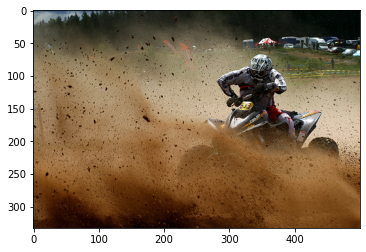

Caption: man in black shirt and jeans is riding bike


In [ ]:




z+=1
pic = list(encoding_test.keys())[z]
image = encoding_test[pic].reshape((1,2048))
x=plt.imread(images+pic)
plt.imshow(x)
plt.show()
print("Caption:",greedySearch(image))